In [1]:
#1. Importing required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
import pandas as pd
df = pd.read_csv("dataset for assignment 2.csv") 

In [3]:
# Cell: Encode Categorical Variables Before Feature Selection

# Encode Gender (Nominal)
df["Gender_Encoded"] = df["Gender"].map({"Female": 0, "Male": 1})

# Encode Activity Level (Ordinal)
activity_mapping = {"Sedentary": 0, "Moderate": 1, "Active": 2}
df["Activity_Level_Encoded"] = df["Activity Level"].map(activity_mapping)

# Apply One-Hot Encoding for Location (Nominal)
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

# Check if encoding was successful
print("Encoded Columns in DataFrame:", df.columns)


Encoded Columns in DataFrame: Index(['User ID', 'Gender', 'Age', 'Activity Level', 'App Sessions',
       'Distance Travelled (km)', 'Calories Burned', 'Gender_Encoded',
       'Activity_Level_Encoded', 'Location_Suburban', 'Location_Urban'],
      dtype='object')


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target variable
features = ['Gender_Encoded', 'Age', 'App Sessions', 'Distance Travelled (km)']
target = 'Calories Burned'

# Split the dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)


In [5]:

# Cell: Compute Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error

# Predict using the trained regression model
y_pred = model.predict(X_test)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the result
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 13045.74


In [6]:

# Cell: Compute Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error

# Compute Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Print the result
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 93.30


In [7]:

# Cell: Compute R² Score (Model Accuracy)

from sklearn.metrics import r2_score

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Print the result
print(f"R² Score: {r2:.2f}")


R² Score: 0.64


In [8]:
from sklearn.metrics import mean_squared_error

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the result
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 13045.74


In [9]:

# Cell: Compute Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error

# Compute Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Print the result
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 93.30


In [10]:

# Cell: Compute R² Score (Model Accuracy)

from sklearn.metrics import r2_score

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Print the result
print(f"R² Score: {r2:.2f}")


R² Score: 0.64


In [11]:
# 2. Loading dataset into DataFrame
data = pd.read_csv('dataset for assignment 2.csv')
data.head()


,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,Female,22,Active,Suburban,151,140,728
1,2,Male,50,Active,Rural,157,115,523
2,3,Male,36,Active,Urban,178,163,795
3,4,Female,36,Active,Suburban,155,85,715
4,5,Male,34,Sedentary,Rural,95,71,439


In [12]:
# 3. Loading and inspecting the dataset
file_path = "dataset for assignment 2.csv"
df = pd.read_csv(file_path)

# Display initial rows
print("First 5 rows of the dataset:\n", df.head())

# Display dataset information
print("\nDataset Information:\n")
df.info()


First 5 rows of the dataset:
    User ID  Gender  Age Activity Level  Location  App Sessions  \
0        1  Female   22         Active  Suburban           151   
1        2    Male   50         Active     Rural           157   
2        3    Male   36         Active     Urban           178   
3        4  Female   36         Active  Suburban           155   
4        5    Male   34      Sedentary     Rural            95   

   Distance Travelled (km)  Calories Burned  
0                      140              728  
1                      115              523  
2                      163              795  
3                       85              715  
4                       71              439  

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gend

In [13]:

# Cell: Encode Categorical Variables (Before Feature Selection)

# Encode Gender (Nominal)
df["Gender_Encoded"] = df["Gender"].map({"Female": 0, "Male": 1})

# Encode Activity Level (Ordinal)
activity_mapping = {"Sedentary": 0, "Moderate": 1, "Active": 2}
df["Activity_Level_Encoded"] = df["Activity Level"].map(activity_mapping)

# Apply One-Hot Encoding for Location (Nominal)
df = pd.get_dummies(df, columns=["Location"], drop_first=True)


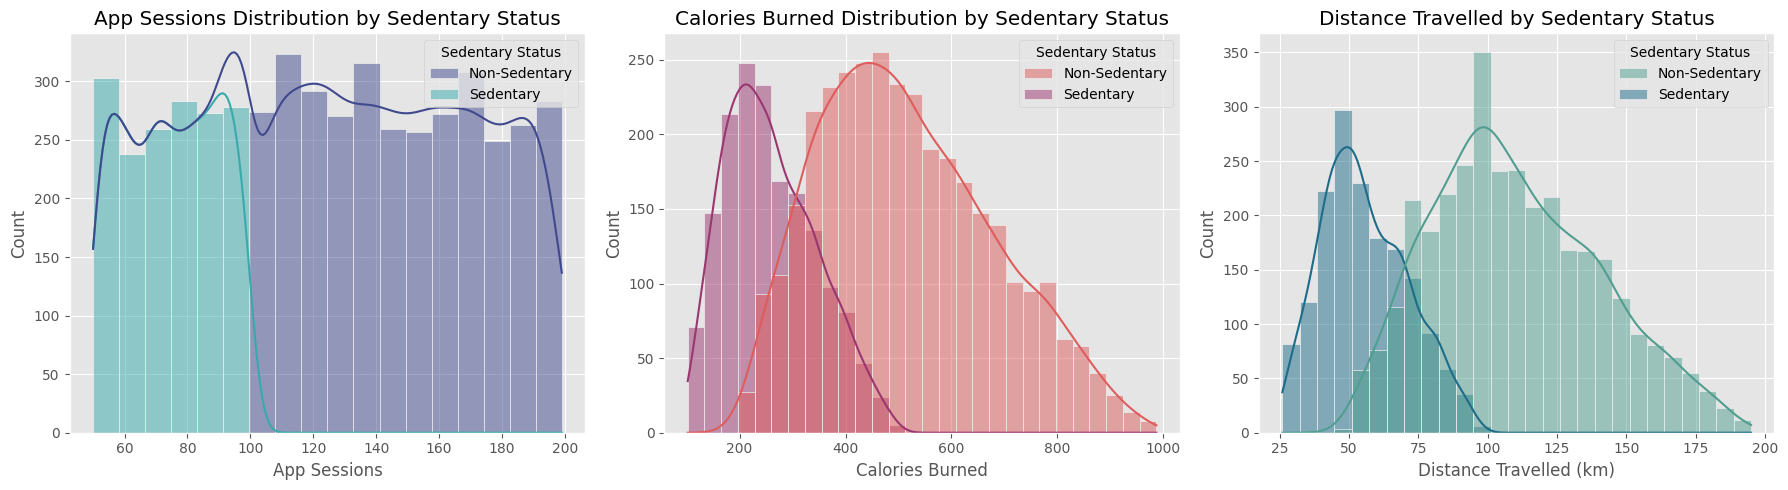

In [14]:
# Cell: Visualization - Numerical Features Comparison (Sedentary vs Non-Sedentary)

# Import libraries explicitly to ensure completeness


# Create Sedentary Status column
df['Sedentary Status'] = df['Activity Level'].apply(lambda x: 'Sedentary' if x == 'Sedentary' else 'Non-Sedentary')

# Set style
plt.style.use("ggplot")

# Create figure and axes for side-by-side histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# App Sessions distribution
sns.histplot(data=df, x='App Sessions', hue='Sedentary Status', multiple='stack', kde=True, ax=axes[0], palette="mako")
axes[0].set_title('App Sessions Distribution by Sedentary Status')

# Calories Burned distribution
sns.histplot(data=df, x='Calories Burned', hue='Sedentary Status', kde=True, ax=axes[1], palette='flare')
axes[1].set_title('Calories Burned Distribution by Sedentary Status')

# Distance Travelled distribution
sns.histplot(data=df, x='Distance Travelled (km)', hue='Sedentary Status', kde=True, ax=axes[2], palette='crest')
axes[2].set_title('Distance Travelled by Sedentary Status')

plt.tight_layout()
plt.show()


C:\Users\Tazzroid\AppData\Local\Temp\ipykernel_23896\1531234792.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity Level', y='App Sessions', data=df, palette='Set3')


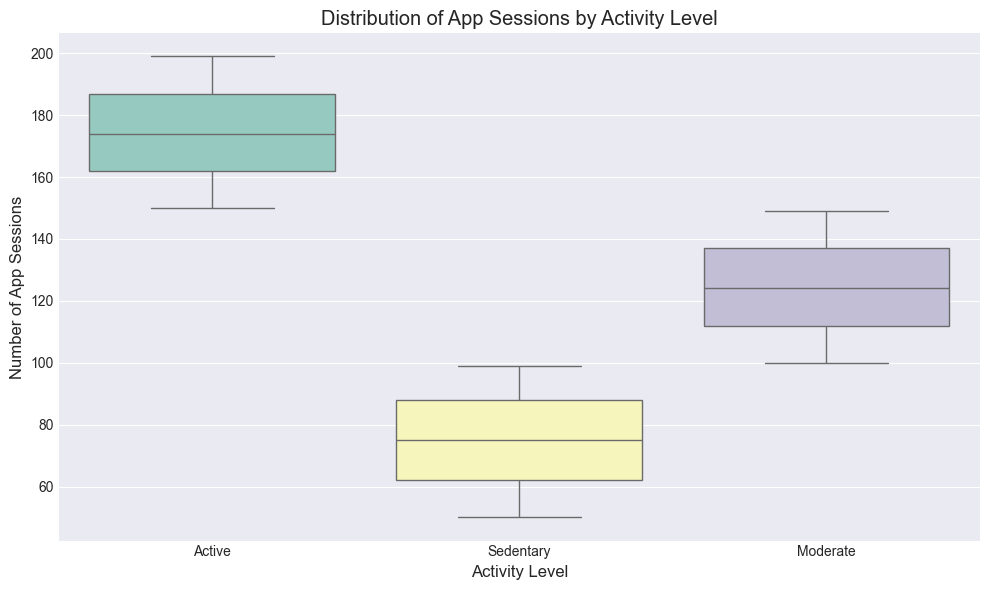

In [15]:
# Set a distinct style for the plot
plt.style.use("seaborn-v0_8-darkgrid")

# Create Boxplot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity Level', y='App Sessions', data=df, palette='Set3')

plt.title('Distribution of App Sessions by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Number of App Sessions')

plt.tight_layout()
plt.show()


User Engagement Comparison:
  Engagement Status  Calories Burned  App Sessions
0            Active       605.996936    174.202819
1          Moderate       432.080161    124.159746
2         Sedentary       259.097919     74.810282


C:\Users\Tazzroid\AppData\Local\Temp\ipykernel_23896\2253233154.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engagement Status', y='Calories Burned', data=engagement_comparison, ax=ax[0], palette='Spectral')
C:\Users\Tazzroid\AppData\Local\Temp\ipykernel_23896\2253233154.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engagement Status', y='App Sessions', data=engagement_comparison, ax=ax[1], palette='Spectral')


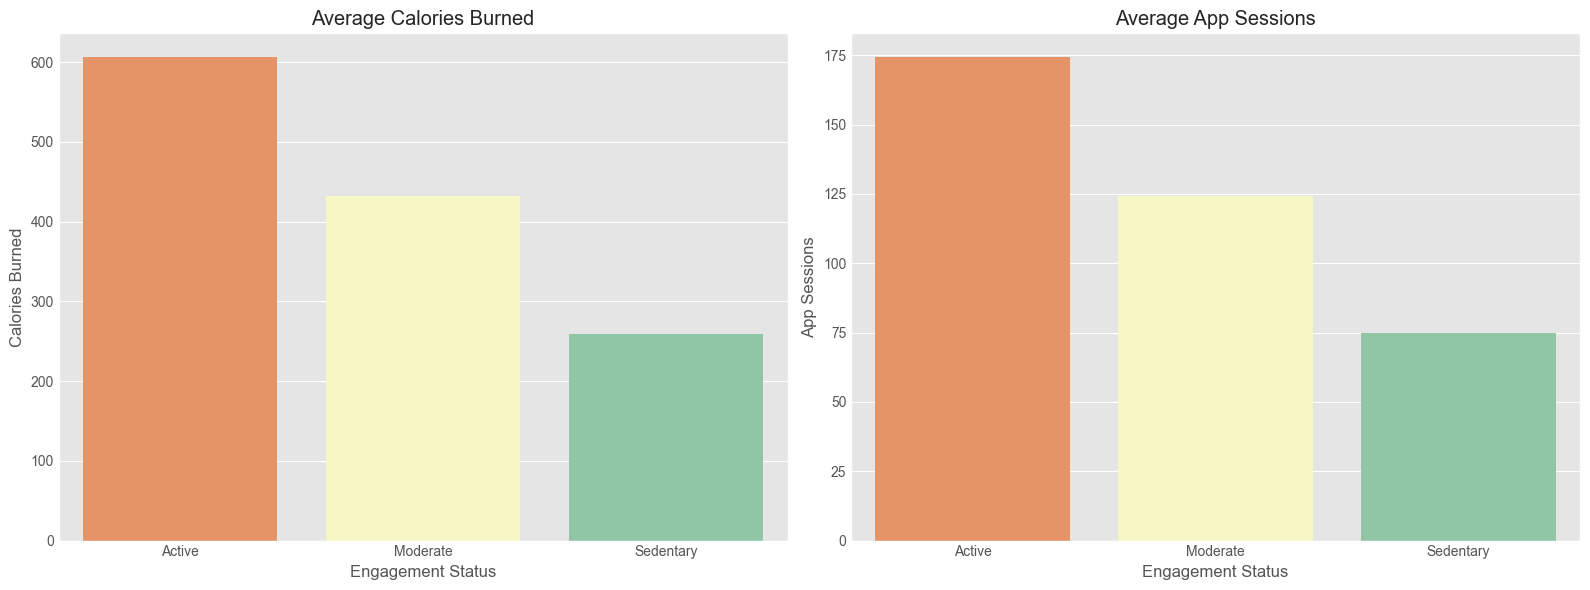

In [24]:
# Cell 3: Sedentary, Moderate, and Active User Engagement Comparison

# Explicitly defining engagement status (Sedentary, Moderate, Active)
df['Engagement Status'] = df['Activity Level'].apply(lambda x: x if x in ['Sedentary', 'Moderate'] else 'Active')

# Calculate mean engagement metrics by Engagement Status
engagement_comparison = df.groupby('Engagement Status')[['Calories Burned', 'App Sessions']].mean().reset_index()
print("User Engagement Comparison:")
print(engagement_comparison)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Calories Burned comparison
sns.barplot(x='Engagement Status', y='Calories Burned', data=engagement_comparison, ax=ax[0], palette='Spectral')
ax[0].set_title('Average Calories Burned')

# App Sessions comparison
sns.barplot(x='Engagement Status', y='App Sessions', data=engagement_comparison, ax=ax[1], palette='Spectral')
ax[1].set_title('Average App Sessions')

plt.tight_layout()
plt.show()


⚠ Warning: 'Location' column not found in dataframe. Skipping one-hot encoding.
Columns used in correlation matrix: ['Gender_Encoded', 'Age', 'Activity_Level_Encoded', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned', 'Calories per Session', 'Distance per Session']
   Gender_Encoded  Age  Activity_Level_Encoded  App Sessions  \
0               0   22                       2           151   
1               1   50                       2           157   
2               1   36                       2           178   
3               0   36                       2           155   
4               1   34                       0            95   

   Distance Travelled (km)  Calories Burned  Calories per Session  \
0                      140              728              4.821192   
1                      115              523              3.331210   
2                      163              795              4.466292   
3                       85              715              4.61

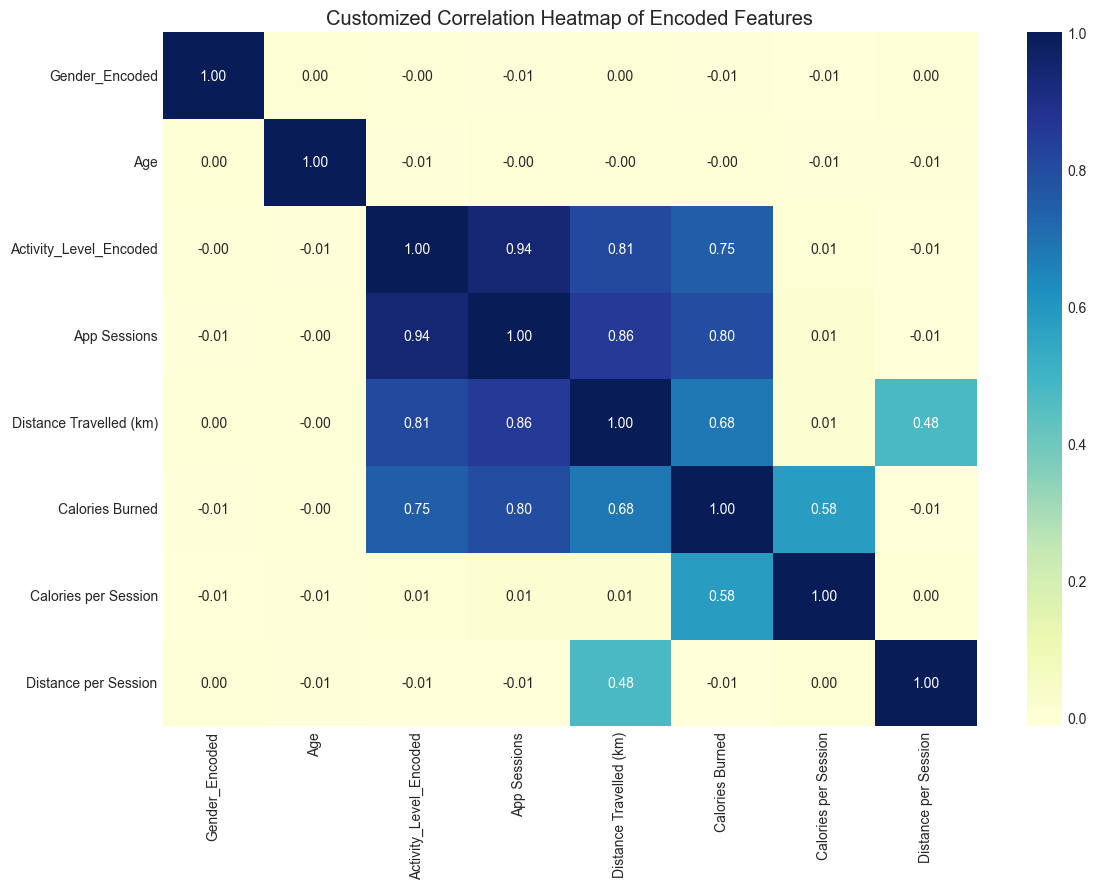

In [16]:

# Cell: Corrected and Customized Correlation Heatmap with Explicit Encoding

# Explicit encoding for Gender
gender_encoder = LabelEncoder()
df['Gender_Encoded'] = gender_encoder.fit_transform(df['Gender'])

# Explicit Encoding for Activity Level
activity_mapping = {'Sedentary': 0, 'Moderate': 1, 'Active': 2}
df['Activity_Level_Encoded'] = df['Activity Level'].map(activity_mapping)

# Ensure "Location" column exists before encoding
if 'Location' in df.columns:
    df_encoded = pd.get_dummies(df, columns=['Location'], prefix='Loc')
else:
    print("⚠ Warning: 'Location' column not found in dataframe. Skipping one-hot encoding.")
    df_encoded = df.copy()  # Prevents breaking the code

# Calculate additional features clearly
df_encoded['Calories per Session'] = df_encoded['Calories Burned'] / df_encoded['App Sessions']
df_encoded['Distance per Session'] = df_encoded['Distance Travelled (km)'] / df_encoded['App Sessions']

# Define numeric columns explicitly and correctly
numeric_cols = ['Gender_Encoded', 'Age', 'Activity_Level_Encoded', 'App Sessions',
                'Distance Travelled (km)', 'Calories Burned', 
                'Calories per Session', 'Distance per Session']

# Include encoded location columns only if they exist
for loc_col in ['Loc_Rural', 'Loc_Suburban', 'Loc_Urban']:
    if loc_col in df_encoded.columns:
        numeric_cols.append(loc_col)

# Verify columns explicitly exist in dataframe
print("Columns used in correlation matrix:", numeric_cols)
print(df_encoded[numeric_cols].head())

# Compute correlation matrix clearly
custom_corr_matrix = df_encoded[numeric_cols].corr()

# Set clear visualization style
plt.style.use("seaborn-v0_8-darkgrid")

# Plot Correlation Heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(custom_corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')

# Add clear title
plt.title("Customized Correlation Heatmap of Encoded Features")

plt.tight_layout()
plt.show()


In [17]:
# Cell: Feature Selection and Scaling for Clustering (Activity Levels: Sedentary, Moderate, Active)

# Create Activity Level grouping clearly defined
df['Engagement Group'] = df['Activity Level'].map({'Sedentary': 0, 'Moderate': 1, 'Active': 2})

# Select relevant features clearly including Engagement Group
X = df[["Distance Travelled (km)", "App Sessions", "Calories Burned", "Engagement Group"]]

# Standardize selected features explicitly (crucial for K-Means clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display scaled features clearly
pd.DataFrame(X_scaled, columns=["Distance Travelled (km)", "App Sessions", "Calories Burned", "Engagement Group"]).head()


,Distance Travelled (km),App Sessions,Calories Burned,Engagement Group
0,1.291412,0.623956,1.577750,1.237800
1,0.610999,0.764521,0.483884,1.237800
2,1.917391,1.256496,1.935257,1.237800
3,-0.205495,0.717666,1.508383,1.237800
4,-0.586526,-0.687979,0.035665,-1.236811


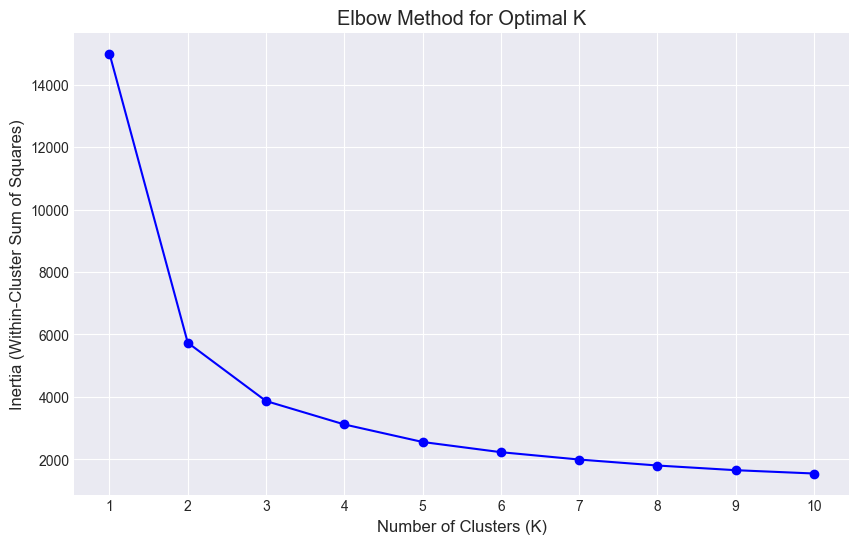

In [18]:
# Cell: Finding Optimal K for K-Means Clustering (Elbow Method)

# Import necessary libraries explicitly
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering explicitly
X = df[["Distance Travelled (km)", "App Sessions", "Calories Burned"]]

# Standardize features explicitly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means for different K values
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve clearly
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')

# Add title and labels clearly
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.grid(True)

plt.show()


In [19]:
# Cell: Applying K-Means Clustering with Optimal K

# Choose optimal K based on the elbow curve
optimal_k = 3  # Adjust this based on your elbow point analysis

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)  # Assign cluster labels

# Display first few rows with assigned clusters
df.head()


,User ID,Gender,Age,Activity Level,App Sessions,Distance Travelled (km),Calories Burned,Gender_Encoded,Activity_Level_Encoded,Location_Suburban,Location_Urban,Sedentary Status,Engagement Group,Cluster
0,1,Female,22,Active,151,140,728,0,2,True,False,Non-Sedentary,2,1
1,2,Male,50,Active,157,115,523,1,2,False,False,Non-Sedentary,2,1
2,3,Male,36,Active,178,163,795,1,2,False,True,Non-Sedentary,2,1
3,4,Female,36,Active,155,85,715,0,2,True,False,Non-Sedentary,2,1
4,5,Male,34,Sedentary,95,71,439,1,0,False,False,Sedentary,0,2


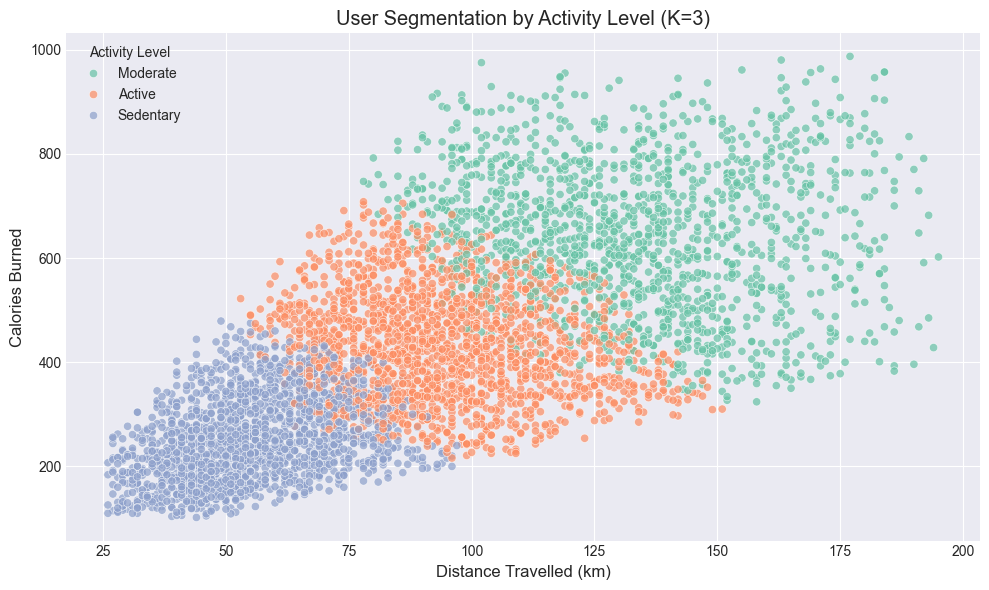

In [20]:
# Cell: Visualizing K-Means Clusters (Sedentary, Moderate, and Active Users)

# Create a new column to map Cluster labels with Activity Levels
activity_map = {0: 'Sedentary', 1: 'Moderate', 2: 'Active'}  # Adjust based on your dataset clustering results
df['Cluster Label'] = df['Cluster'].map(activity_map)

# Set visualization style
plt.style.use("seaborn-v0_8-darkgrid")

# Create scatter plot with explicit Activity Level mapping
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Distance Travelled (km)"], 
                y=df["Calories Burned"], 
                hue=df["Cluster Label"], 
                palette="Set2", 
                alpha=0.7)

# Add clear titles and labels
plt.xlabel("Distance Travelled (km)")
plt.ylabel("Calories Burned")
plt.title(f"User Segmentation by Activity Level (K={optimal_k})")
plt.legend(title="Activity Level")

plt.tight_layout()
plt.show()


In [21]:
# Cell: Compute Silhouette Score for Sedentary, Moderate, and Active User Clusters

from sklearn.metrics import silhouette_score

# Explicitly create the Sedentary Status column if not already done
df['Sedentary Status'] = df['Activity Level'].apply(lambda x: 'Sedentary' if x == 'Sedentary' else ('Moderate' if x == 'Moderate' else 'Active'))

# Calculate silhouette scores separately for each category
silhouette_scores = {}

for activity in ['Sedentary', 'Moderate', 'Active']:
    cluster_subset = df[df['Sedentary Status'] == activity]  # Filter specific category
    if len(cluster_subset) > 1:  # Ensure at least 2 samples for silhouette calculation
        silhouette_scores[activity] = silhouette_score(X_scaled[df['Sedentary Status'] == activity], 
                                                       kmeans.labels_[df['Sedentary Status'] == activity])
    else:
        silhouette_scores[activity] = None  # Not enough samples for silhouette calculation

# Print Silhouette Scores for each group
for category, score in silhouette_scores.items():
    if score is not None:
        print(f"Silhouette Score for {category} Users: {score:.4f}")
    else:
        print(f"Not enough data points to compute Silhouette Score for {category} users.")


Silhouette Score for Sedentary Users: 0.3345
Silhouette Score for Moderate Users: 0.1267
Silhouette Score for Active Users: 0.2406


C:\Users\Tazzroid\AppData\Local\Temp\ipykernel_23896\3880277779.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Activity Level")
C:\Users\Tazzroid\AppData\Local\Temp\ipykernel_23896\3880277779.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Activity Level", y="App Sessions", palette="Set2", ax=axes[1])
C:\Users\Tazzroid\AppData\Local\Temp\ipykernel_23896\3880277779.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Activity Level", y="Calories Burned", palette="magma", ax=axes[2])


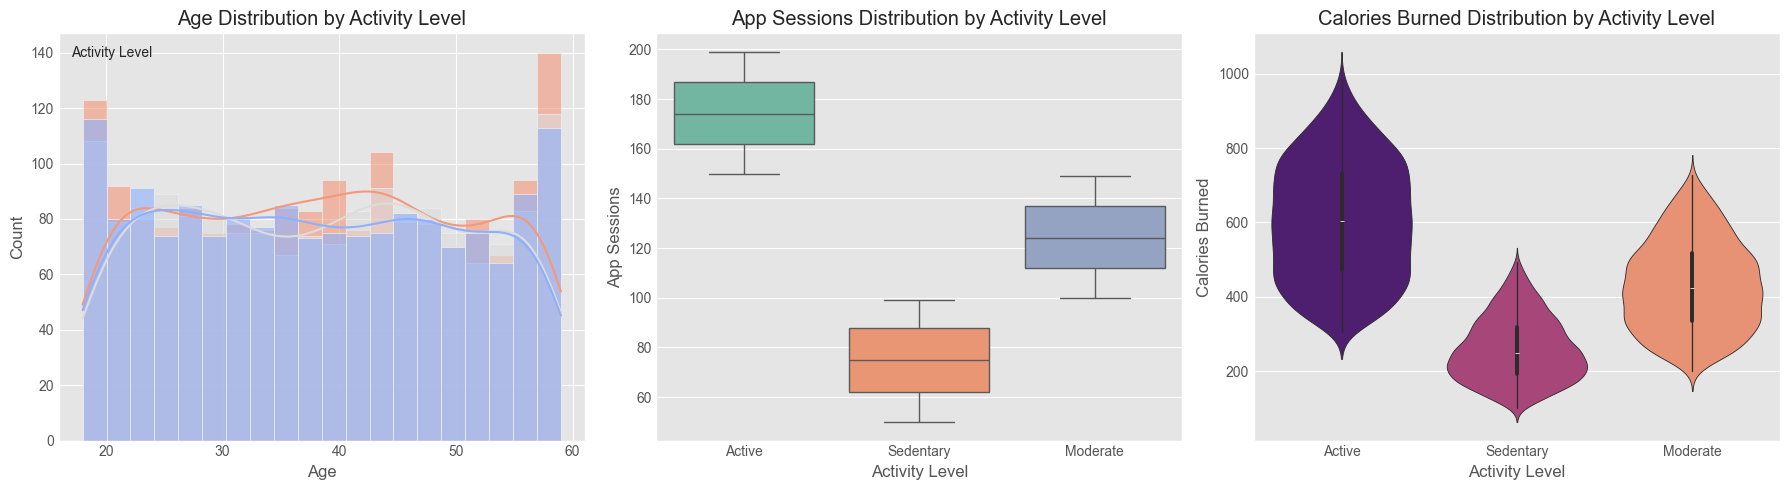

In [22]:
# Cell: Multi-Graph Visualization for Sedentary, Moderate, and Active Users

# Set visualization style
plt.style.use("ggplot")

# Create a single figure with subplots for three distinct visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Age Distribution by Activity Level
sns.histplot(data=df, x="Age", hue="Activity Level", bins=20, kde=True, palette="coolwarm", alpha=0.6, ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Age Distribution by Activity Level")
axes[0].legend(title="Activity Level")

# 2. App Sessions Distribution by Activity Level
sns.boxplot(data=df, x="Activity Level", y="App Sessions", palette="Set2", ax=axes[1])
axes[1].set_xlabel("Activity Level")
axes[1].set_ylabel("App Sessions")
axes[1].set_title("App Sessions Distribution by Activity Level")

# 3. Calories Burned Distribution by Activity Level
sns.violinplot(data=df, x="Activity Level", y="Calories Burned", palette="magma", ax=axes[2])
axes[2].set_xlabel("Activity Level")
axes[2].set_ylabel("Calories Burned")
axes[2].set_title("Calories Burned Distribution by Activity Level")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [23]:
# Cell: Correlation & Statistical Test for Sedentary, Moderate, and Active Users

from scipy import stats

# 1. Correlation Analysis: App Sessions vs. Calories Burned (by Activity Level)
corr_sedentary = stats.pearsonr(df[df["Activity Level"] == "Sedentary"]["App Sessions"], 
                                df[df["Activity Level"] == "Sedentary"]["Calories Burned"])

corr_moderate = stats.pearsonr(df[df["Activity Level"] == "Moderate"]["App Sessions"], 
                               df[df["Activity Level"] == "Moderate"]["Calories Burned"])

corr_active = stats.pearsonr(df[df["Activity Level"] == "Active"]["App Sessions"], 
                             df[df["Activity Level"] == "Active"]["Calories Burned"])

# 2. Kruskal-Wallis Test: Comparing Calories Burned Across Activity Levels
calories_sedentary = df[df["Activity Level"] == "Sedentary"]["Calories Burned"]
calories_moderate = df[df["Activity Level"] == "Moderate"]["Calories Burned"]
calories_active = df[df["Activity Level"] == "Active"]["Calories Burned"]

stat, p_value = stats.kruskal(calories_sedentary, calories_moderate, calories_active)

# Print results
print(f"Sedentary: App Sessions vs Calories Burned Correlation: {corr_sedentary[0]:.2f} (p-value: {corr_sedentary[1]:.4f})")
print(f"Moderate: App Sessions vs Calories Burned Correlation: {corr_moderate[0]:.2f} (p-value: {corr_moderate[1]:.4f})")
print(f"Active: App Sessions vs Calories Burned Correlation: {corr_active[0]:.2f} (p-value: {corr_active[1]:.4f})")
print(f"Kruskal-Wallis Test (Calories Burned Across Activity Levels): p-value = {p_value:.4f}")


Sedentary: App Sessions vs Calories Burned Correlation: 0.62 (p-value: 0.0000)
Moderate: App Sessions vs Calories Burned Correlation: 0.44 (p-value: 0.0000)
Active: App Sessions vs Calories Burned Correlation: 0.30 (p-value: 0.0000)
Kruskal-Wallis Test (Calories Burned Across Activity Levels): p-value = 0.0000
